<h1 style="text-align: center">AIPI 510 Project 1</h1>

<h2>Happiness Index of Countries Over Time</h2>
<b>Author(s):</b> Shreya Mendi, Yash Bhargava
<br>
<b>Date:</b> 9/30/2025

<h2>Data Source</h2>
<p>Put source of data here</p>

<h3>About Dataset</h3>
<p>The dataset contains yearly happiness report by country and contains 13 columns including:
<ul>
    <li>Year</li>
    <li>Rank</li>
    <li>Country name</li>
    <li>Ladder Score</li>
    <li>upperwhisker</li>
    <li>lowerwhisker</li>
    <li>Explained by: Log GDP per capita</li>
    <li>Explained by: Social support</li>
    <li>Explained by: Health life expectancy</li>
    <li>Explained by: Freedom to make life choices</li>
    <li>Explained by: Generosity</li>
    <li>Explained by: Perceptions of corruption</li>
    <li>Dystopia + residual</li>
</ul>
</p>

<h3>Methodology</h3>
<p>Several steps were taken including:<br>Data preprocessing to clean and prepare the data<br>Exploratory data analysis (EDA)<br>Feature engineering and transformation</p>

<h4>Import Libraries</h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

<h4>Load Data</h4>

In [2]:
df = pd.read_excel("WHR25_Data_Figure_2.1.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        1969 non-null   int64  
 1   Rank                                        1969 non-null   int64  
 2   Country name                                1969 non-null   object 
 3   Ladder score                                1969 non-null   float64
 4   upperwhisker                                875 non-null    float64
 5   lowerwhisker                                875 non-null    float64
 6   Explained by: Log GDP per capita            872 non-null    float64
 7   Explained by: Social support                872 non-null    float64
 8   Explained by: Healthy life expectancy       870 non-null    float64
 9   Explained by: Freedom to make life choices  871 non-null    float64
 10  Explained by

In [3]:
df.describe()

Year         Rank  Ladder score  upperwhisker  lowerwhisker  \
count  1969.000000  1969.000000   1969.000000    875.000000    875.000000   
mean   2017.714068    76.430168      5.451903      5.648684      5.418734   
std       3.964913    43.942744      1.121864      1.103939      1.139063   
min    2011.000000     1.000000      1.364000      1.427000      1.301000   
25%    2015.000000    38.000000      4.596000      4.885000      4.638164   
50%    2018.000000    76.000000      5.456200      5.775000      5.529000   
75%    2021.000000   114.000000      6.295000      6.458500      6.254000   
max    2024.000000   158.000000      7.856000      7.904000      7.780000   

       Explained by: Log GDP per capita  Explained by: Social support  \
count                        872.000000                    872.000000   
mean                           1.220279                      1.078536   
std                            0.463448                      0.355057   
min                            0.000000                      0.000000   
25%                            0.901355                      0.850750   
50%                            1.263500                      1.106699   
75%                            1.567000                      1.361000   
max                            2.209000                      1.840000   

       Explained by: Healthy life expectancy  \
count                             870.000000   
mean                                0.542915   
std                                 0.222944   
min                                 0.000000   
25%                                 0.383000   
50%                                 0.555000   
75%                                 0.704750   
max                                 1.137814   

       Explained by: Freedom to make life choices  Explained by: Generosity  \
count                                  871.000000                872.000000   
mean                                     0.563730                  0.154261   
std                                      0.180204                  0.086731   
min                                      0.000000                  0.000000   
25%                                      0.450527                  0.092000   
50%                                      0.571000                  0.140500   
75%                                      0.676000                  0.205000   
max                                      1.018000                  0.569814   

       Explained by: Perceptions of corruption  Dystopia + residual  
count                               871.000000           868.000000  
mean                                  0.144356             1.832778  
std                                   0.120290             0.628796  
min                                   0.000000            -0.110000  
25%                                   0.062000             1.455000  
50%                                   0.113000             1.854000  
75%                                   0.180000             2.237078  
max                                   0.587000             3.482000

In [4]:
df.head()

Year  Rank Country name  Ladder score  upperwhisker  lowerwhisker  \
0  2024     1      Finland         7.736         7.810         7.662   
1  2023   143  Afghanistan         1.721         1.775         1.667   
2  2022   137  Afghanistan         1.859         1.923         1.795   
3  2021   146  Afghanistan         2.404         2.469         2.339   
4  2020   150  Afghanistan         2.523         2.596         2.449   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                             1.749                         1.783   
1                             0.628                         0.000   
2                             0.645                         0.000   
3                             0.758                         0.000   
4                             0.370                         0.000   

   Explained by: Healthy life expectancy  \
0                                  0.824   
1                                  0.242   
2                                  0.087   
3                                  0.289   
4                                  0.126   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.986                     0.110   
1                                       0.000                     0.091   
2                                       0.000                     0.093   
3                                       0.000                     0.089   
4                                       0.000                     0.122   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.502                1.782  
1                                    0.088                0.672  
2                                    0.059                0.976  
3                                    0.005                1.263  
4                                    0.010                1.895

<h4>Data Preprocessing</h4>
<h5>Mapping countries to create a region column</h5>

In [5]:
region_map = {
    # Carribean
    "Cuba": "Carribean",
    # Europe
    "Belarus": "Europe",
    "Finland": "Europe",
    "Denmark": "Europe",
    "Iceland": "Europe",
    "Sweden": "Europe",
    "Netherlands": "Europe",
    "Republic of Moldova": "Europe",
    "Malta": "Europe",
    "Norway": "Europe",
    "Luxembourg": "Europe",
    "Switzerland": "Europe",
    "Macedonia": "Europe",
    "Belgium": "Europe",
    "Ireland": "Europe",
    "Lithuania": "Europe",
    "Austria": "Europe",
    "Slovenia": "Europe",
    "Czechia": "Europe",
    "Germany": "Europe",
    "United Kingdom": "Europe",
    "Poland": "Europe",
    "France": "Europe",
    "Romania": "Europe",
    "Spain": "Europe",
    "Estonia": "Europe",
    "Italy": "Europe",
    "Latvia": "Europe",
    "Slovakia": "Europe",
    "Portugal": "Europe",
    "Hungary": "Europe",
    "Montenegro": "Europe",
    "Croatia": "Europe",
    "Greece": "Europe",
    "Bulgaria": "Europe",
    "North Macedonia": "Europe",
    "Albania": "Europe",
    "Serbia": "Europe",
    "Bosnia and Herzegovina": "Europe",
    "Ukraine": "Europe",
    "Kosovo": "Europe",

    # North America
    "United States": "North America",
    "Canada": "North America",
    "Mexico": "North America",
    "Belize": "North America",

    # Central & South America
    "Costa Rica": "Latin America",
    "Brazil": "Latin America",
    "El Salvador": "Latin America",
    "Puerto Rico": "Latin America",
    "Guyana": "Latin America",
    "Panama": "Latin America",
    "Argentina": "Latin America",
    "Guatemala": "Latin America",
    "Suriname": "Latin America",
    "Chile": "Latin America",
    "Nicaragua": "Latin America",
    "Paraguay": "Latin America",
    "Uruguay": "Latin America",
    "Ecuador": "Latin America",
    "Honduras": "Latin America",
    "Colombia": "Latin America",
    "Peru": "Latin America",
    "Bolivia": "Latin America",
    "Dominican Republic": "Latin America",
    "Venezuela": "Latin America",
    "Jamaica": "Latin America",
    "Trinidad and Tobago": "Latin America",
    "Haiti": "Latin America",  # if present

    # Asia-Pacific
    "Australia": "Oceania",
    "New Zealand": "Oceania",
    "Israel": "Middle East",
    "United Arab Emirates": "Middle East",
    "Saudi Arabia": "Middle East",
    "Kuwait": "Middle East",
    "Bahrain": "Middle East",
    "Oman": "Middle East",
    "Qatar": "Middle East",  # if present
    "Turkey": "Middle East",
    "Türkiye": "Middle East",
    "State of Palestine": "Middle East",
    "Iran": "Middle East",
    "Iraq": "Middle East",
    "Jordan": "Middle East",
    "Lebanon": "Middle East",

    # Asia
    "Afghanistan": "Asia",
    "Bhutan": "Asia",
    "China": "Asia",
    "India": "Asia",
    "Pakistan": "Asia",
    "Bangladesh": "Asia",
    "Turkmenistan": "Asia",
    "Nepal": "Asia",
    "Viet Nam": "Asia",
    "Sri Lanka": "Asia",
    "Myanmar": "Asia",
    "Thailand": "Asia",
    "Vietnam": "Asia",
    "Cambodia": "Asia",
    "Lao PDR": "Asia",
    "Indonesia": "Asia",
    "Malaysia": "Asia",
    "Singapore": "Asia",
    "Philippines": "Asia",
    "Japan": "Asia",
    "Republic of Korea": "Asia",
    "Taiwan Province of China": "Asia",
    "Mongolia": "Asia",
    "Kazakhstan": "Asia",
    "Uzbekistan": "Asia",
    "Kyrgyzstan": "Asia",
    "Tajikistan": "Asia",
    "Armenia": "Asia",
    "Azerbaijan": "Asia",
    "Georgia": "Asia",
    "Hong Kong SAR of China": "Asia",
    "Maldives": "Asia",  # if present

    # Africa
    "Angola": "Africa",
    "Burundi": "Africa",
    "Central African Republic": "Africa",
    "Djibouti": "Africa",
    "South Africa": "Africa",
    "Nigeria": "Africa",
    "Ghana": "Africa",
    "Gambia": "Africa",
    "South Sudan": "Africa",
    "Togo": "Africa",
    "Rwanda": "Africa",
    "Kenya": "Africa",
    "Somaliland Region": "Africa",
    "Uganda": "Africa",
    "Tanzania": "Africa",
    "Ethiopia": "Africa",
    "Swaziland": "Africa",
    "Zimbabwe": "Africa",
    "Zambia": "Africa",
    "Malawi": "Africa",
    "Mozambique": "Africa",
    "Cameroon": "Africa",
    "Senegal": "Africa",
    "Namibia": "Africa",
    "Côte d’Ivoire": "Africa",
    "Guinea": "Africa",
    "Chad": "Africa",
    "Mali": "Africa",
    "Somalia": "Africa",
    "Mauritania": "Africa",
    "Burkina Faso": "Africa",
    "Benin": "Africa",
    "Liberia": "Africa",
    "Sierra Leone": "Africa",
    "Madagascar": "Africa",
    "Gabon": "Africa",
    "Congo": "Africa",
    "DR Congo": "Africa",
    "Botswana": "Africa",
    "Niger": "Africa",
    "Eswatini": "Africa",
    "Lesotho": "Africa",
    "Comoros": "Africa",
    "Mauritius": "Africa",
    "Libya": "Africa",
    "Egypt": "Africa",
    "Algeria": "Africa",
    "Tunisia": "Africa",
    "Morocco": "Africa",
    "Sudan": "Africa",   # if present
    "Yemen": "Middle East/Africa",  # sometimes grouped
    "Cyprus": "Middle East",
    "Syria": "Middle East",
    "North Cyprus": "Middle East",
    "Russian Federation": "Europe/Asia"

}

In [6]:
# Mapping countries to regions
df["Region"] = df["Country name"].map(region_map)
# Cleaning up column names
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
              .str.replace(":", "")
)
# Changed ranking values by 1 as all data was shifted by 1
df.loc[df["year"] == 2020, "rank"] = df.loc[df["year"] == 2020, "rank"] - 1
# Checking null values per column
df.isnull().sum()

year                                            0
rank                                            0
country_name                                    0
ladder_score                                    0
upperwhisker                                 1094
lowerwhisker                                 1094
explained_by_log_gdp_per_capita              1097
explained_by_social_support                  1097
explained_by_healthy_life_expectancy         1099
explained_by_freedom_to_make_life_choices    1098
explained_by_generosity                      1097
explained_by_perceptions_of_corruption       1098
dystopia_+_residual                          1101
region                                          0
dtype: int64

<h5>Checking for duplicate data</h5>

In [7]:
# Checking for duplicate data
df.duplicated(subset=["year", "country_name"]).sum()

np.int64(0)

<h5>Checking for years that have missing data, this will help with data visualizations as well as any necessary data cleaning needed</h5>

In [8]:
missing_values_by_year_summary = df.groupby('year').agg(lambda x: x.isna().sum())
missing_values_by_year_summary

rank  country_name  ladder_score  upperwhisker  lowerwhisker  \
year                                                                 
2011     0             0             0           156           156   
2012     0             0             0           156           156   
2014     0             0             0           158           158   
2015     0             0             0           157           157   
2016     0             0             0           155           155   
2017     0             0             0           156           156   
2018     0             0             0           156           156   
2019     0             0             0             0             0   
2020     0             0             0             0             0   
2021     0             0             0             0             0   
2022     0             0             0             0             0   
2023     0             0             0             0             0   
2024     0             0             0             0             0   

      explained_by_log_gdp_per_capita  explained_by_social_support  \
year                                                                 
2011                              156                          156   
2012                              156                          156   
2014                              158                          158   
2015                              157                          157   
2016                              155                          155   
2017                              156                          156   
2018                              156                          156   
2019                                0                            0   
2020                                0                            0   
2021                                0                            0   
2022                                0                            0   
2023                                3                            3   
2024                                0                            0   

      explained_by_healthy_life_expectancy  \
year                                         
2011                                   156   
2012                                   156   
2014                                   158   
2015                                   157   
2016                                   155   
2017                                   156   
2018                                   156   
2019                                     0   
2020                                     0   
2021                                     0   
2022                                     1   
2023                                     3   
2024                                     1   

      explained_by_freedom_to_make_life_choices  explained_by_generosity  \
year                                                                       
2011                                        156                      156   
2012                                        156                      156   
2014                                        158                      158   
2015                                        157                      157   
2016                                        155                      155   
2017                                        156                      156   
2018                                        156                      156   
2019                                          0                        0   
2020                                          0                        0   
2021                                          0                        0   
2022                                          0                        0   
2023                                          3                        3   
2024                                          1                        0   

      explained_by_perceptions_of_corruption  dystopia_+_residual  regio

<h5>We can see a lot of data missing is between years 2011-2018, as a result we will just use data from 2019 and up and clean that</h5>

In [9]:
new_df = df[df['year'].between(2019,2024)].copy()
# Sort data in ascending order for years for each country
new_df = new_df.sort_values(by=["country_name", 'year'])
new_df.isnull().sum()

year                                         0
rank                                         0
country_name                                 0
ladder_score                                 0
upperwhisker                                 0
lowerwhisker                                 0
explained_by_log_gdp_per_capita              3
explained_by_social_support                  3
explained_by_healthy_life_expectancy         5
explained_by_freedom_to_make_life_choices    4
explained_by_generosity                      3
explained_by_perceptions_of_corruption       4
dystopia_+_residual                          7
region                                       0
dtype: int64

In [10]:
rows_with_missing = new_df[new_df.isnull().any(axis=1)]

rows_with_missing

year  rank        country_name  ladder_score  upperwhisker  \
110   2023    62             Bahrain         5.959         6.153   
673   2024    52                Oman         6.197         6.420   
1646  2022    99  State of Palestine         4.908         5.089   
1645  2023   103  State of Palestine         4.879         5.006   
1403  2024   108  State of Palestine         4.780         4.886   
1718  2023    88          Tajikistan         5.281         5.361   
1174  2024    90          Tajikistan         5.411         5.485   

      lowerwhisker  explained_by_log_gdp_per_capita  \
110          5.766                              NaN   
673          5.973                            1.603   
1646         4.727                            1.144   
1645         4.753                              NaN   
1403         4.675                            1.047   
1718         5.201                              NaN   
1174         5.337                            0.914   

      explained_by_social_support  explained_by_healthy_life_expectancy  \
110                           NaN                                   NaN   
673                         1.411                                 0.500   
1646                        1.309                                   NaN   
1645                          NaN                                   NaN   
1403                        1.456                                   NaN   
1718                          NaN                                   NaN   
1174                        1.555                                 0.658   

      explained_by_freedom_to_make_life_choices  explained_by_generosity  \
110                                         NaN                      NaN   
673                                       0.930                    0.142   
1646                                      0.416                    0.065   
1645                                        NaN                      NaN   
1403                                      0.618                    0.055   
1718                                        NaN                      NaN   
1174                                        NaN                    0.085   

      explained_by_perceptions_of_corruption  dystopia_+_residual       region  
110                                      NaN                  NaN  Middle East  
673                                      NaN                  NaN  Middle East  
1646                                   0.067                  NaN  Middle East  
1645                                     NaN                  NaN  Middle East  
1403                                   0.081                  NaN  Middle East  
1718                                     NaN                  NaN         Asia  
1174                                   0.342                  NaN         Asia

In [11]:
countries_missing = ['Bahrain', 'Oman', 'State of Palestine', 'Tajikistan']
for country in countries_missing:
    print(f'Number of entries for {country}: ', len(new_df[new_df['country_name'] == country]))

Number of entries for Bahrain:  6
Number of entries for Oman:  1
Number of entries for State of Palestine:  6
Number of entries for Tajikistan:  6


In [12]:
# Bahrain data
bahrain = (new_df['country_name'] == 'Bahrain') & (new_df['year'].between(2019, 2022))
bahrain_averages = new_df.loc[bahrain].mean(numeric_only=True)

bahrain_2023 = (new_df['country_name'] == 'Bahrain') & (new_df['year'] == 2023)
new_df.loc[bahrain_2023] = new_df.loc[bahrain_2023].fillna(bahrain_averages)

# State of Palestine data
sp = (new_df['country_name'] == 'State of Palestine') & (new_df['year'].between(2019, 2021))
sp_averages = new_df.loc[sp].mean(numeric_only=True)

sp_2022_2024 = (new_df['country_name'] == 'State of Palestine') & (new_df['year'].between(2022,2024))
new_df.loc[sp_2022_2024] = new_df.loc[sp_2022_2024].fillna(sp_averages)

# Tajikstan data
tajikstan = (new_df['country_name'] == 'Tajikistan') & (new_df['year'].between(2019, 2022))
tajikstan_averages = new_df.loc[tajikstan].mean(numeric_only=True)

tajikstan_2023_2024 = (new_df['country_name'] == 'Tajikistan') & (new_df['year'].between(2023,2024))
new_df.loc[tajikstan_2023_2024] = new_df.loc[tajikstan_2023_2024].fillna(tajikstan_averages)

# Oman is a special case - Fill with regional averages
numeric_cols = new_df.select_dtypes('number').columns
new_df[numeric_cols] = new_df.groupby('region')[numeric_cols].transform(lambda x: x.fillna(x.mean()))

# Re-verify no missing data
new_df.isnull().sum()

year                                         0
rank                                         0
country_name                                 0
ladder_score                                 0
upperwhisker                                 0
lowerwhisker                                 0
explained_by_log_gdp_per_capita              0
explained_by_social_support                  0
explained_by_healthy_life_expectancy         0
explained_by_freedom_to_make_life_choices    0
explained_by_generosity                      0
explained_by_perceptions_of_corruption       0
dystopia_+_residual                          0
region                                       0
dtype: int64

In [13]:
# Save cleaned data as a new file
new_df.to_csv("WHR25_Data_Figure_2.1_cleaned.xlsx")

<h4>Exploratory Data Analysis</h4>

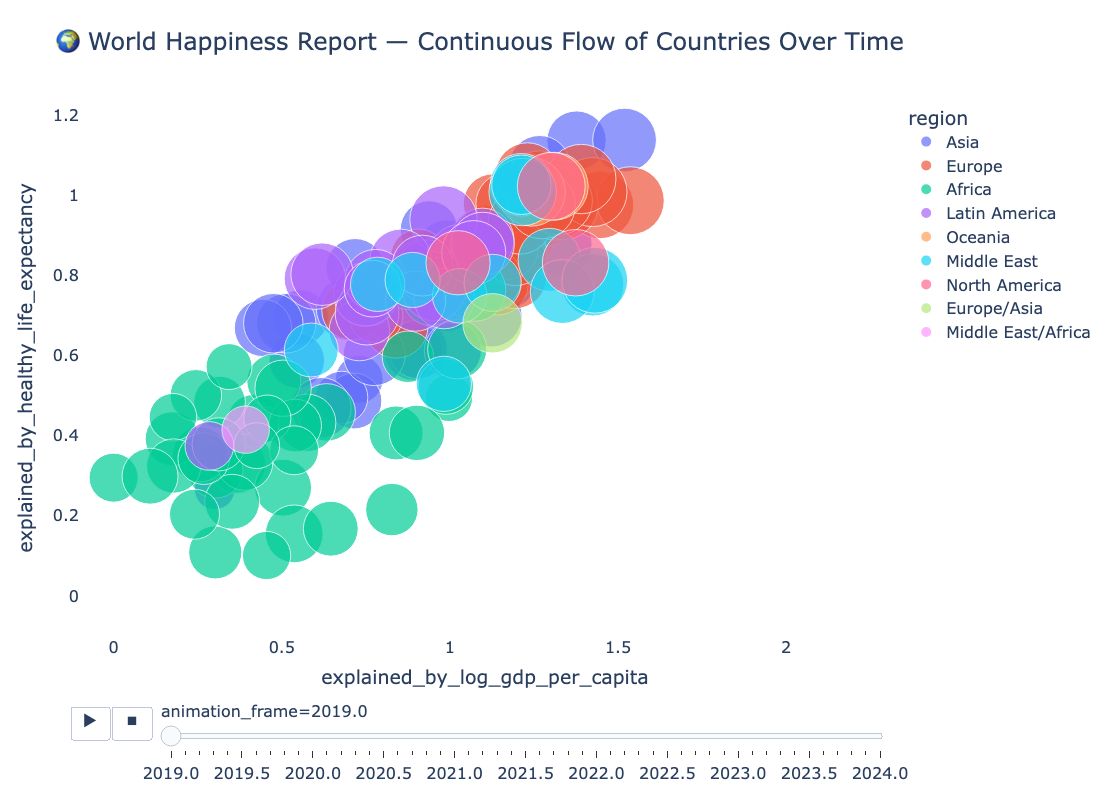

In [14]:
years = sorted(new_df["year"].unique())
all_frames = []

for i in range(len(years) - 1):
    year_start, year_end = years[i], years[i+1]
    df_start = new_df[new_df["year"] == year_start].set_index("country_name")
    df_end = new_df[new_df["year"] == year_end].set_index("country_name")

    # Align by country (drop if missing in either year)
    common_countries = df_start.index.intersection(df_end.index)
    df_start, df_end = df_start.loc[common_countries], df_end.loc[common_countries]

    # Generate smooth intermediate frames (10 steps per year)
    steps = 10
    for j in range(steps):
        alpha = j / steps
        df_interp = df_start.copy()
        for col in ["ladder_score", "explained_by_log_gdp_per_capita", "explained_by_healthy_life_expectancy"]:
            df_interp[col] = (1-alpha)*df_start[col] + alpha*df_end[col]
        df_interp["year"] = year_start + alpha*(year_end - year_start)
        all_frames.append(df_interp.reset_index())

# Add the last year
all_frames.append(new_df[new_df["year"] == years[-1]])

# Concatenate all interpolated frames
df_smooth = pd.concat(all_frames, ignore_index=True)

# -----------------------------
# Plotly Animated Scatter
# -----------------------------
fig = px.scatter(
    df_smooth,
    x="explained_by_log_gdp_per_capita",
    y="explained_by_healthy_life_expectancy",
    size="ladder_score",
    color="region",
    hover_name="country_name",
    animation_frame=df_smooth["year"].round(1).astype(str),  # smooth fractional years
    animation_group="country_name",
    size_max=50,
    range_x=[new_df["explained_by_log_gdp_per_capita"].min()-0.1, new_df["explained_by_log_gdp_per_capita"].max()+0.1],
    range_y=[new_df["explained_by_healthy_life_expectancy"].min()-0.1, new_df["explained_by_healthy_life_expectancy"].max()+0.1],
    title="🌍 World Happiness Report — Continuous Flow of Countries Over Time"
)

# Make animation smooth & slow
fig.update_layout(
    height=800, width=1100,
    font=dict(size=16),
    title_font=dict(size=24),
    plot_bgcolor="white"
)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 300  # slower per frame
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 300  # smooth ease

fig.show()

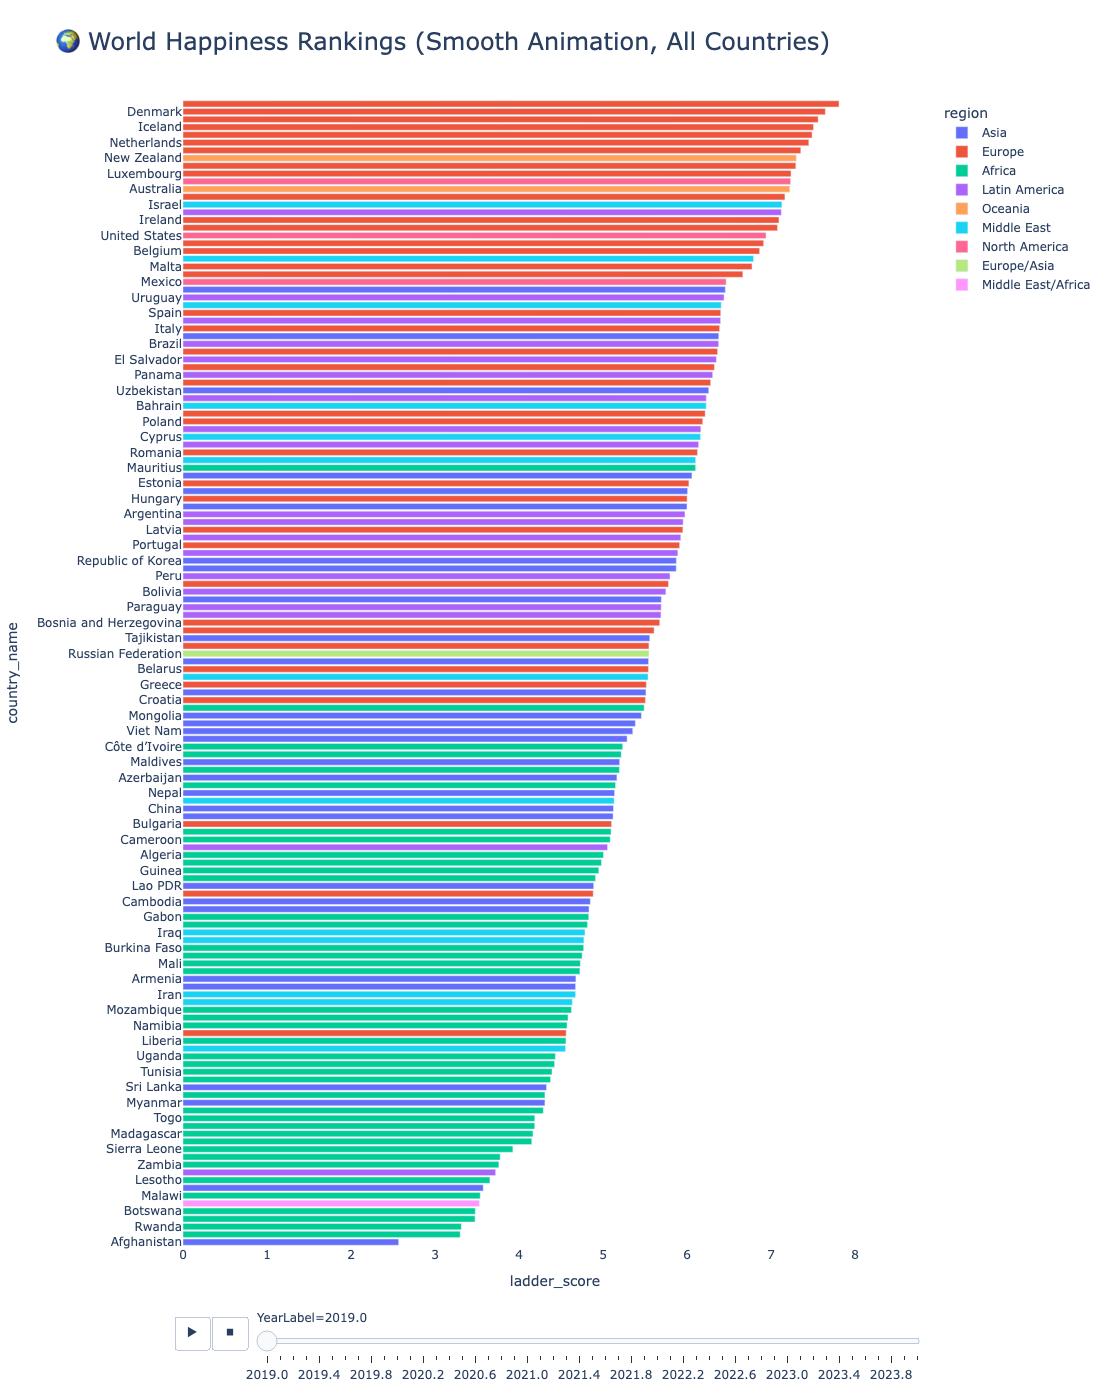

In [15]:
rankings = new_df[["year", "country_name", "rank", "ladder_score", "region"]].sort_values(["year", "rank"])

years = sorted(new_df["year"].unique())
all_frames = []

for i in range(len(years) - 1):
    year_start, year_end = years[i], years[i+1]
    df_start = new_df[new_df["year"] == year_start].set_index("country_name")
    df_end = new_df[new_df["year"] == year_end].set_index("country_name")

    # Align by country (drop if missing in either year)
    common_countries = df_start.index.intersection(df_end.index)
    df_start, df_end = df_start.loc[common_countries], df_end.loc[common_countries]

    # Generate smooth intermediate frames (10 steps per year)
    steps = 10
    for j in range(steps):
        alpha = j / steps
        df_interp = df_start.copy()
        for col in ["ladder_score", "rank"]:
            df_interp[col] = (1-alpha)*df_start[col] + alpha*df_end[col]
        df_interp["year"] = year_start + alpha*(year_end - year_start)
        all_frames.append(df_interp.reset_index())

# Add final year
all_frames.append(new_df[new_df["year"] == years[-1]])

# Concatenate interpolated frames
df_smooth = pd.concat(all_frames, ignore_index=True)

# Round year labels for animation
df_smooth["YearLabel"] = df_smooth["year"].round(1).astype(str)

# -----------------------------
# Plotly Bar Chart Race
# -----------------------------
fig = px.bar(
    df_smooth,
    x="ladder_score",
    y="country_name",
    orientation="h",
    color="region",
    animation_frame="YearLabel",
    animation_group="country_name",
    range_x=[0, df["ladder_score"].max() + 1],
    title="🌍 World Happiness Rankings (Smooth Animation, All Countries)",
    height=1400, width=1100
)

# Make Rank 1 appear at top
fig.update_layout(
    yaxis={'categoryorder':'total ascending'},
    font=dict(size=12),
    title_font=dict(size=24),
    plot_bgcolor='white'
)

# Slow down animation
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 3000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 3000

fig.show()

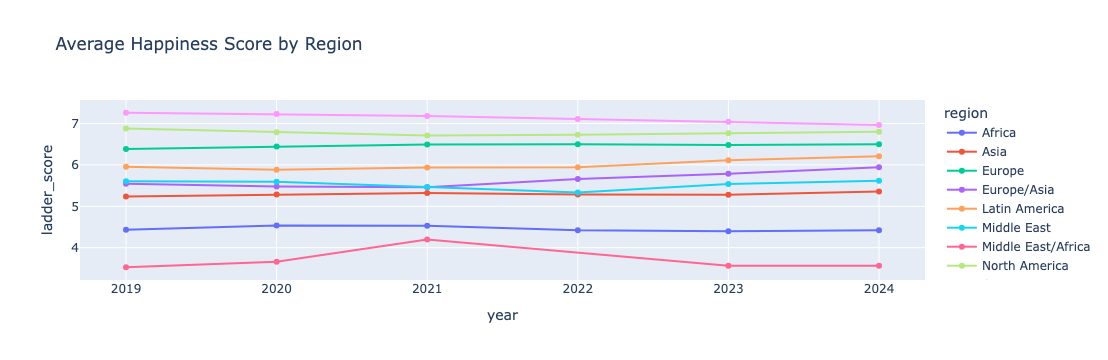

In [16]:
region_trends = new_df.groupby(["year","region"])["ladder_score"].mean().reset_index()

fig = px.line(
    region_trends,
    x="year", y="ladder_score",
    color="region",
    markers=True,
    title="Average Happiness Score by Region"
)
fig.show()

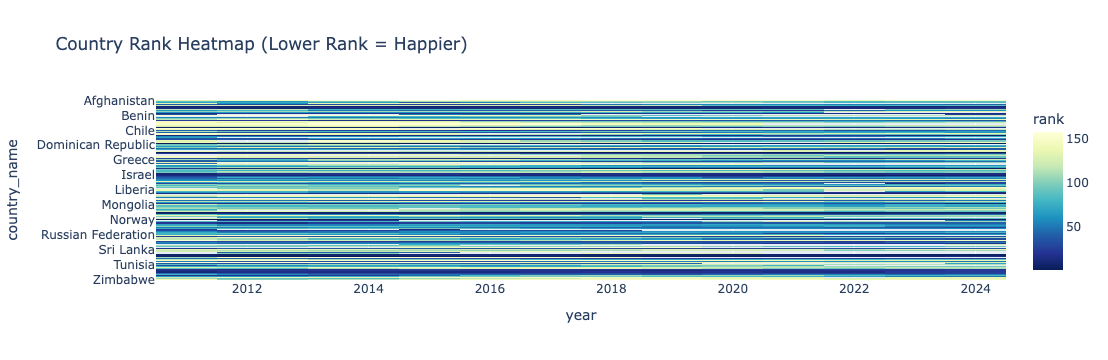

In [17]:
heatmap_data = df.pivot(index="country_name", columns="year", values="rank")

fig = px.imshow(
    heatmap_data,
    aspect="auto",
    color_continuous_scale="YlGnBu_r",
    title="Country Rank Heatmap (Lower Rank = Happier)",
    labels=dict(color="rank")
)
fig.update_yaxes(autorange="reversed")  # so Rank 1 is at the top
fig.show()


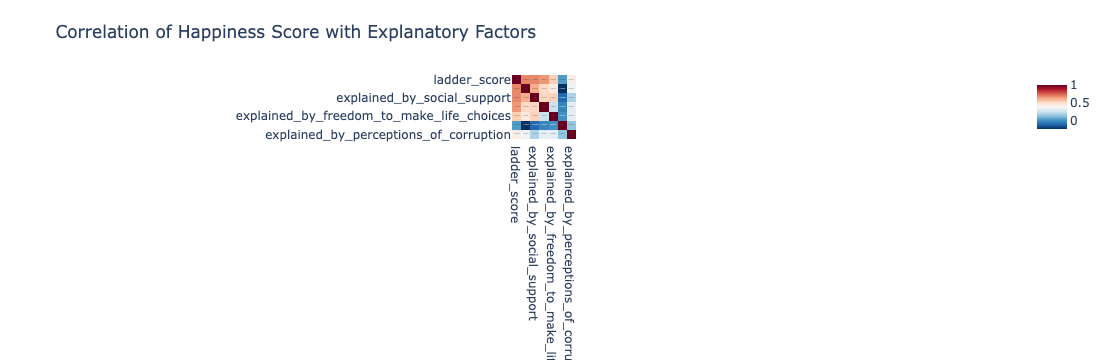

In [18]:
corr = new_df[[
    "ladder_score",
    "explained_by_log_gdp_per_capita",
    "explained_by_social_support",
    "explained_by_healthy_life_expectancy",
    "explained_by_freedom_to_make_life_choices",
    "explained_by_generosity",
    "explained_by_perceptions_of_corruption"
]].corr()

fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    title="Correlation of Happiness Score with Explanatory Factors"
)
fig.show()


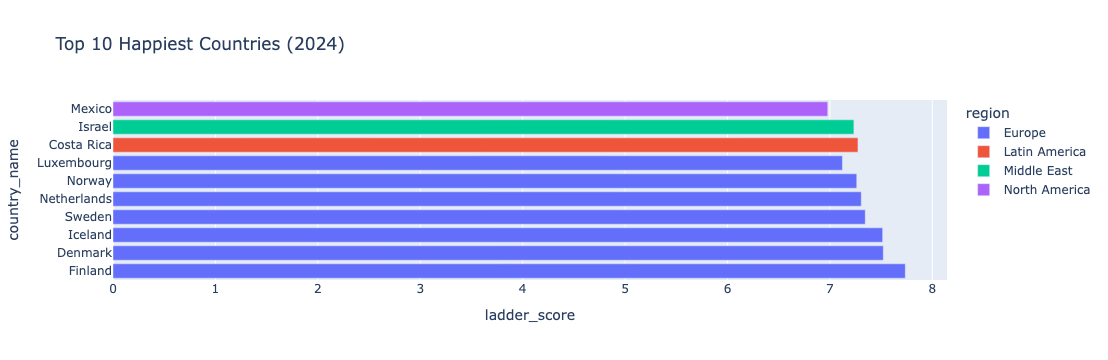

In [19]:
top10 = new_df[new_df['year']==2024].nlargest(10, 'ladder_score')

fig = px.bar(
    top10,
    x="ladder_score", y="country_name",
    orientation="h",
    color="region",
    title="Top 10 Happiest Countries (2024)"
)
fig.show()

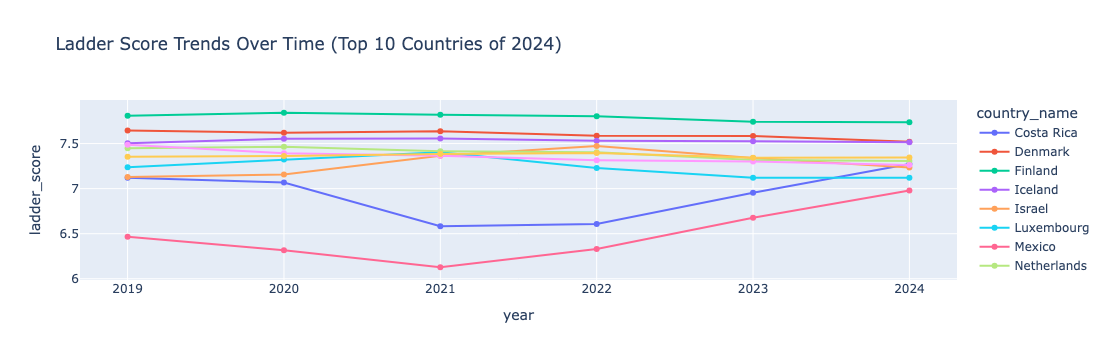

In [20]:
fig = px.line(
    new_df[new_df['country_name'].isin(top10['country_name'])],
    x="year", y="ladder_score", color="country_name",
    title="Ladder Score Trends Over Time (Top 10 Countries of 2024)",
    markers=True
)
fig.show()


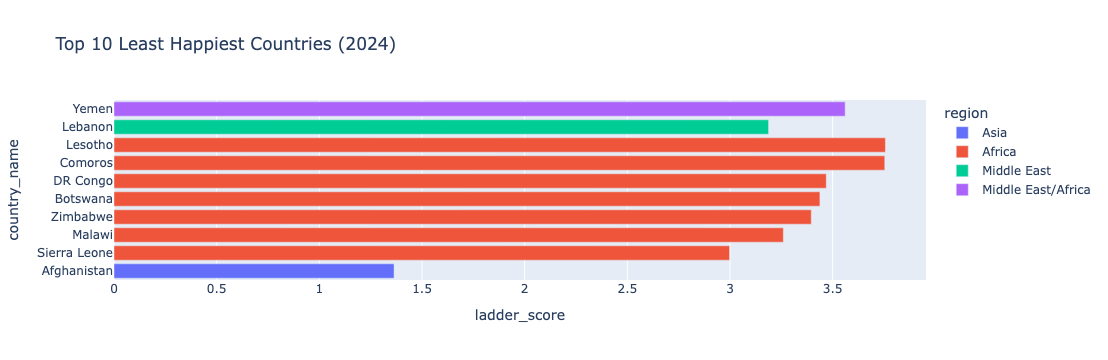

In [21]:
bottom10 = new_df[new_df['year']==2024].nsmallest(10, 'ladder_score')

fig = px.bar(
    bottom10,
    x="ladder_score", y="country_name",
    orientation="h",
    color="region",
    title="Top 10 Least Happiest Countries (2024)"
)
fig.show()

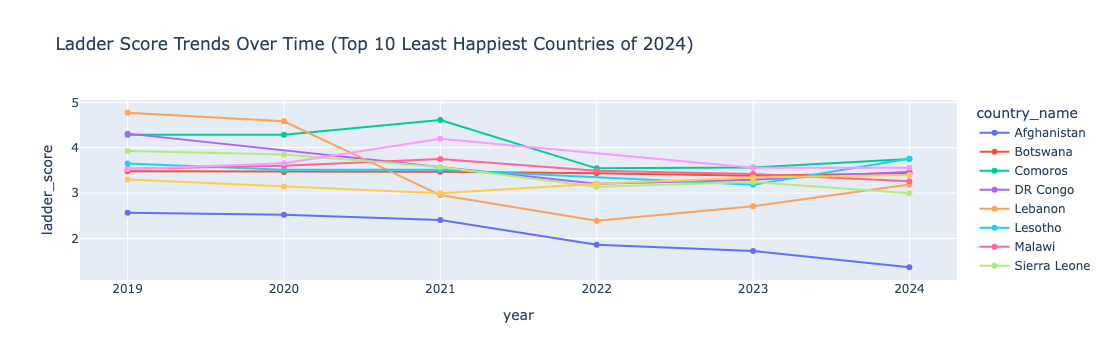

In [22]:
fig = px.line(
    new_df[new_df['country_name'].isin(bottom10['country_name'])],
    x="year", y="ladder_score", color="country_name",
    title="Ladder Score Trends Over Time (Top 10 Least Happiest Countries of 2024)",
    markers=True
)
fig.show()


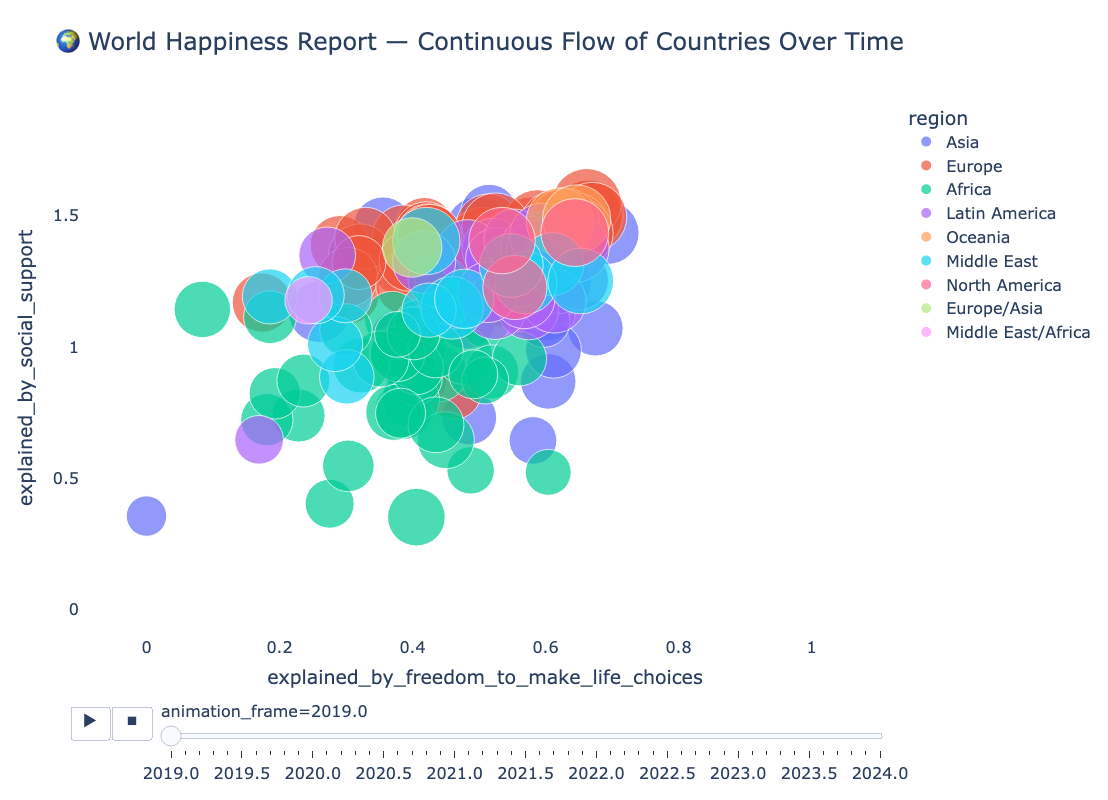

In [25]:
years = sorted(new_df["year"].unique())
all_frames = []

for i in range(len(years) - 1):
    year_start, year_end = years[i], years[i+1]
    df_start = new_df[new_df["year"] == year_start].set_index("country_name")
    df_end = new_df[new_df["year"] == year_end].set_index("country_name")

    # Align by country (drop if missing in either year)
    common_countries = df_start.index.intersection(df_end.index)
    df_start, df_end = df_start.loc[common_countries], df_end.loc[common_countries]

    # Generate smooth intermediate frames (10 steps per year)
    steps = 10
    for j in range(steps):
        alpha = j / steps
        df_interp = df_start.copy()
        for col in ["ladder_score", "explained_by_freedom_to_make_life_choices", "explained_by_social_support"]:
            df_interp[col] = (1-alpha)*df_start[col] + alpha*df_end[col]
        df_interp["year"] = year_start + alpha*(year_end - year_start)
        all_frames.append(df_interp.reset_index())

# Add the last year
all_frames.append(new_df[new_df["year"] == years[-1]])

# Concatenate all interpolated frames
df_smooth = pd.concat(all_frames, ignore_index=True)

# -----------------------------
# Plotly Animated Scatter
# -----------------------------
fig = px.scatter(
    df_smooth,
    x="explained_by_freedom_to_make_life_choices",
    y="explained_by_social_support",
    size="ladder_score",
    color="region",
    hover_name="country_name",
    animation_frame=df_smooth["year"].round(1).astype(str),  # smooth fractional years
    animation_group="country_name",
    size_max=50,
    range_x=[new_df["explained_by_freedom_to_make_life_choices"].min()-0.1, new_df["explained_by_freedom_to_make_life_choices"].max()+0.1],
    range_y=[new_df["explained_by_social_support"].min()-0.1, new_df["explained_by_social_support"].max()+0.1],
    title="🌍 World Happiness Report — Continuous Flow of Countries Over Time"
)

# Make animation smooth & slow
fig.update_layout(
    height=800, width=1100,
    font=dict(size=16),
    title_font=dict(size=24),
    plot_bgcolor="white"
)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 300  # slower per frame
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 300  # smooth ease

fig.show()